In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

plt.style.use('ggplot')

## Loading the amazon reviews dataset

In [2]:
reviews = pd.read_csv(r"/kaggle/input/amazon-fine-food-reviews/Reviews.csv")

In [3]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Clipping the dataset only to needed columns

In [4]:
data = reviews[['Id','Text', 'Score', 'Summary']]
data.head()

,Id,Text,Score,Summary
0,1,I have bought several of the Vitality canned d...,5,Good Quality Dog Food
1,2,Product arrived labeled as Jumbo Salted Peanut...,1,Not as Advertised
2,3,This is a confection that has been around a fe...,4,"""Delight"" says it all"
3,4,If you are looking for the secret ingredient i...,2,Cough Medicine
4,5,Great taffy at a great price. There was a wid...,5,Great taffy


In [5]:
print("Shape of the dataset: ", data.shape)
print("Sum of null values: ", data.isna().sum())

Shape of the dataset:  (568454, 4)
Sum of null values:  Id          0
Text        0
Score       0
Summary    27
dtype: int64


### Dropping nan values from the dataframe

In [6]:
data = data.dropna()
print("Sum of null values: ", data.isna().sum())

Sum of null values:  Id         0
Text       0
Score      0
Summary    0
dtype: int64


## Exploring the data

In [7]:
# checking the number of unique values available in the score column
data['Score'].unique()

array([5, 1, 4, 2, 3])

### Score 5 review | Positive

In [8]:
print("Text: ", data.at[0, 'Text'])
print("\nScore: ", data.at[0, 'Score'])
print("\nSummary: ", data.at[0, 'Summary'])

Text:  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Score:  5

Summary:  Good Quality Dog Food


### Score 1 review | Negative

In [9]:
print("Text: ", data.at[1, 'Text'])
print("\nScore: ", data.at[1, 'Score'])
print("\nSummary: ", data.at[1, 'Summary'])

Text:  Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

Score:  1

Summary:  Not as Advertised


In [10]:
scoreValueCounts = data['Score'].value_counts()
scoreValueCounts

5    363122
4     80655
1     52268
3     42638
2     29744
Name: Score, dtype: int64

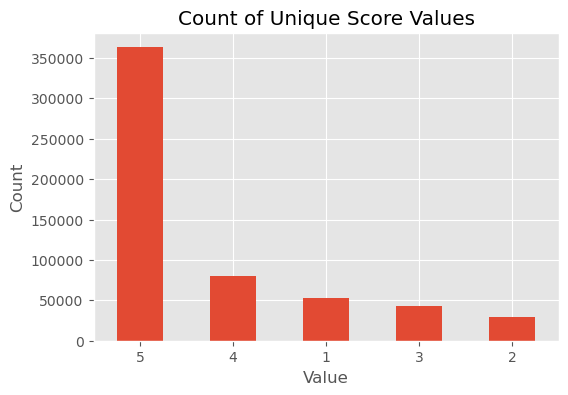

In [11]:
fig = plt.figure(figsize=(6, 4))
chart = scoreValueCounts.plot.bar(rot=0)

chart.set_title('Count of Unique Score Values')
chart.set_xlabel('Value')
chart.set_ylabel('Count')

plt.show()

# Balancing the Data

In [12]:
# setting up a sample count
sampleCount = 200

fiveScoreDf = data[data["Score"] == 5].sample(sampleCount)
fourScoreDf = data[data["Score"] == 4].sample(sampleCount)
threeScoreDf = data[data["Score"] == 3].sample(sampleCount)
twoScoreDf = data[data["Score"] == 2].sample(sampleCount)
oneScoreDf = data[data["Score"] == 1].sample(sampleCount)

print("Unique values and shape of all the separate score dataframes: ")
print("\nFiveScoreDf shape: ", fiveScoreDf.shape, " Unique scores: ",fiveScoreDf['Score'].unique())
print("\nFourScoreDf shape: ", fourScoreDf.shape, " Unique scores: ", fourScoreDf['Score'].unique())
print("\nThreeScoreDf shape: ", threeScoreDf.shape, " Unique scores: ", threeScoreDf['Score'].unique())
print("\nTwoScoreDf shape: ", twoScoreDf.shape, " Unique scores: ", twoScoreDf['Score'].unique())
print("\nOneScoreDf shape: ", oneScoreDf.shape, " Unique scores: ", oneScoreDf['Score'].unique())

Unique values and shape of all the separate score dataframes: 

FiveScoreDf shape:  (200, 4)  Unique scores:  [5]

FourScoreDf shape:  (200, 4)  Unique scores:  [4]

ThreeScoreDf shape:  (200, 4)  Unique scores:  [3]

TwoScoreDf shape:  (200, 4)  Unique scores:  [2]

OneScoreDf shape:  (200, 4)  Unique scores:  [1]


In [13]:
# merging all the five scores into one dataFrame
balancedData = pd.concat([fiveScoreDf, fourScoreDf, threeScoreDf, twoScoreDf, oneScoreDf])
print("Value counts: ", balancedData['Score'].value_counts())
print("\nShape: ", balancedData.shape)

Value counts:  5    200
4    200
3    200
2    200
1    200
Name: Score, dtype: int64

Shape:  (1000, 4)


In [14]:
# renaming the dataframe
df = balancedData
df.head()

,Id,Text,Score,Summary
462709,462710,"I just used this product for the first time, I...",5,It tastes great!!!
168806,168807,I like this over all other sports drinks becau...,5,Great stuff!
193265,193266,With the baking season upon me I realized I wa...,5,Super tasty and great value here..today.
361886,361887,We normally drink treehugger by coffee people ...,5,As good as treehugger
120497,120498,Having received a new Keurig brewer during the...,5,Love these cappuccino k-cups


## Trying the NLTK tokenization

In [15]:
# getting a sample review from the dataset
sample = df.sample(1)['Text'].iloc[0]
sample

"I decided to be risky and order a big box on unknown tea - this stuff, along with big boxes of Blueberry and Raspberry.  The other teas were better than expected - but this stuff was just plain unflavorful and weird tasting.  Couldn't taste the strawberry.  Perhaps the weird taste is the Rooibos in the tea.  I have to be sure to never buy a rooibos based tea again, although the stuff is supposed to be good for you.<br /><br />I drink my tea iced and always brew a bag of plain ol green tea in with the herb bags, but I don't think the green tea messed this tea up.  When I first opened the foil pouch, the tea looked different and didn't have that rich fruity smell of the other teas and I thought 'uh oh'.  I was right.<br /><br />Won't be buying this again, but that is purely my personal taste - the kids didn't like it either and they are big tea drinkers."

In [16]:
# getting tokens from the sample we got from the dataset text
tokens =  nltk.word_tokenize(sample)
tokens[:10]

['I', 'decided', 'to', 'be', 'risky', 'and', 'order', 'a', 'big', 'box']

In [17]:
# getting the Part of Speech from the tokens
tagged  = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('decided', 'VBD'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('risky', 'JJ'),
 ('and', 'CC'),
 ('order', 'NN'),
 ('a', 'DT'),
 ('big', 'JJ'),
 ('box', 'NN')]

In [18]:
# getting the named entity recognition

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  decided/VBD
  to/TO
  be/VB
  risky/JJ
  and/CC
  order/NN
  a/DT
  big/JJ
  box/NN
  on/IN
  unknown/JJ
  tea/NN
  -/:
  this/DT
  stuff/NN
  ,/,
  along/IN
  with/IN
  big/JJ
  boxes/NNS
  of/IN
  (PERSON Blueberry/NNP)
  and/CC
  (PERSON Raspberry/NNP)
  ./.
  The/DT
  other/JJ
  teas/NNS
  were/VBD
  better/JJR
  than/IN
  expected/VBN
  -/:
  but/CC
  this/DT
  stuff/NN
  was/VBD
  just/RB
  plain/JJ
  unflavorful/JJ
  and/CC
  weird/JJ
  tasting/NN
  ./.
  Could/MD
  n't/RB
  taste/VB
  the/DT
  strawberry/NN
  ./.
  Perhaps/RB
  the/DT
  weird/JJ
  taste/NN
  is/VBZ
  the/DT
  (ORGANIZATION Rooibos/NNP)
  in/IN
  the/DT
  tea/NN
  ./.
  I/PRP
  have/VBP
  to/TO
  be/VB
  sure/JJ
  to/TO
  never/RB
  buy/VB
  a/DT
  rooibos/NN
  based/VBN
  tea/NN
  again/RB
  ,/,
  although/IN
  the/DT
  stuff/NN
  is/VBZ
  supposed/VBN
  to/TO
  be/VB
  good/JJ
  for/IN
  you./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  drink/VBP
  my/PRP$
  tea/NN


## VADER Sentiment Scoring

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

""" 
    tqdm is a library in python that shows a progress bar, which can be helpful for
    long running operations. This library can be used to wrap any iterable, such as
    for loops, while loops, generators.
"""

analyzer = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
# checking the analyzer module
analyzer.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [21]:
analyzer.polarity_scores("I am feeling sad")

{'neg': 0.554, 'neu': 0.179, 'pos': 0.268, 'compound': -0.3818}

In [22]:
analyzer.polarity_scores("The product is very very impressive")

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.5956}

In [23]:
print(sample)
print(f"\nThe polarity score of the sample is: ", analyzer.polarity_scores(sample))

I decided to be risky and order a big box on unknown tea - this stuff, along with big boxes of Blueberry and Raspberry.  The other teas were better than expected - but this stuff was just plain unflavorful and weird tasting.  Couldn't taste the strawberry.  Perhaps the weird taste is the Rooibos in the tea.  I have to be sure to never buy a rooibos based tea again, although the stuff is supposed to be good for you.<br /><br />I drink my tea iced and always brew a bag of plain ol green tea in with the herb bags, but I don't think the green tea messed this tea up.  When I first opened the foil pouch, the tea looked different and didn't have that rich fruity smell of the other teas and I thought 'uh oh'.  I was right.<br /><br />Won't be buying this again, but that is purely my personal taste - the kids didn't like it either and they are big tea drinkers.

The polarity score of the sample is:  {'neg': 0.089, 'neu': 0.845, 'pos': 0.067, 'compound': -0.586}


In [24]:
# running the polarity score on the whole dataset
result = {}

for _, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    rowId = row['Id']
    
    result[rowId] = analyzer.polarity_scores(text)
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [25]:
# changing the result dictionary to a transpose dataframe
resultDf = pd.DataFrame(result).T

# changing the result dataframe's column index to Id 
resultDf = resultDf.reset_index().rename(columns={'index': 'Id'})

# merging the main dataframe with the result Dataframe
df1 = resultDf.merge(df, how='left')

df1.head()

,Id,neg,neu,pos,compound,Text,Score,Summary
0,462710,0.000,0.769,0.231,0.9492,"I just used this product for the first time, I...",5,It tastes great!!!
1,168807,0.000,0.793,0.207,0.9293,I like this over all other sports drinks becau...,5,Great stuff!
2,193266,0.000,0.724,0.276,0.9917,With the baking season upon me I realized I wa...,5,Super tasty and great value here..today.
3,361887,0.027,0.664,0.308,0.9813,We normally drink treehugger by coffee people ...,5,As good as treehugger
4,120498,0.114,0.602,0.284,0.7840,Having received a new Keurig brewer during the...,5,Love these cappuccino k-cups


## Plotting the Score with Compound from polarity score

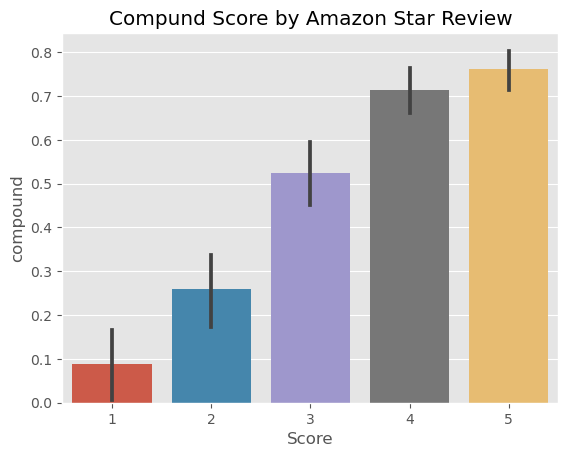

In [26]:
ax = sns.barplot(data=df1, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

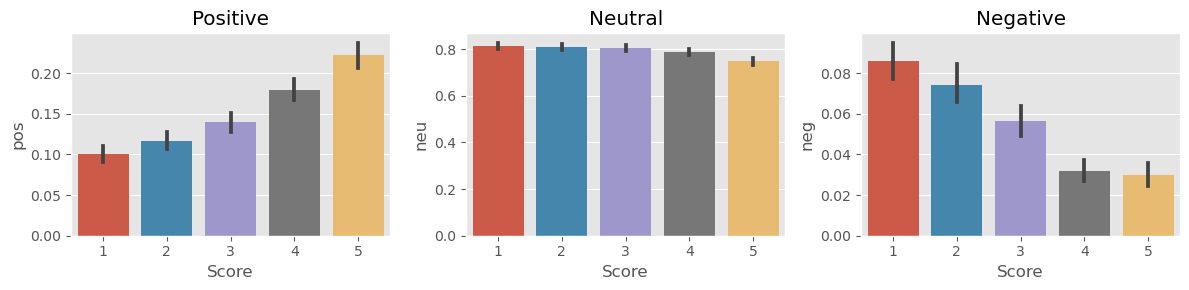

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df1, x='Score', y='pos', ax=axs[0])
sns.barplot(data=df1, x='Score', y='neu', ax=axs[1])
sns.barplot(data=df1, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [30]:
print(sample)

I decided to be risky and order a big box on unknown tea - this stuff, along with big boxes of Blueberry and Raspberry.  The other teas were better than expected - but this stuff was just plain unflavorful and weird tasting.  Couldn't taste the strawberry.  Perhaps the weird taste is the Rooibos in the tea.  I have to be sure to never buy a rooibos based tea again, although the stuff is supposed to be good for you.<br /><br />I drink my tea iced and always brew a bag of plain ol green tea in with the herb bags, but I don't think the green tea messed this tea up.  When I first opened the foil pouch, the tea looked different and didn't have that rich fruity smell of the other teas and I thought 'uh oh'.  I was right.<br /><br />Won't be buying this again, but that is purely my personal taste - the kids didn't like it either and they are big tea drinkers.


In [31]:
print(f"\n The polarity score with VADER for the sample is: ", analyzer.polarity_scores(sample))


 The polarity score with VADER for the sample is:  {'neg': 0.089, 'neu': 0.845, 'pos': 0.067, 'compound': -0.586}


In [32]:
# Run for Roberta Model on the sample we got from dataframe
encoded_text = tokenizer(sample, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

print(f"\n The polarity score with Roberta for the sample is: ", scores_dict)


 The polarity score with Roberta for the sample is:  {'roberta_neg': 0.704887, 'roberta_neu': 0.24333237, 'roberta_pos': 0.051780637}


In [33]:
"""
    Creating a function which takes a text sample and returns the roberta polarity
    score in a dictionary format
"""

def getPolarityScoresRoberta(txtSample):
    encoded_text = tokenizer(txtSample, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
        }
    
    return scores_dict

In [34]:
# initiaing an empty dicitonary to store all the merged results from vader and roberta
result = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        textId = row['Id']
        
        # getting the vader model polarity scores
        vader_result = analyzer.polarity_scores(text)
        # creating an empty dictionary
        vader_result_renamed = {}
        
        # looping over the items in the vader scores
        for key, value in vader_result.items():
            # adding vader with the key name and appending to the empty dictionary
            vader_result_renamed[f"vader_{key}"] = value
        
        # getting roberta modelr scores
        roberta_result = getPolarityScoresRoberta(text)
        
        # merging the two results into one dictionary
        merged = {**vader_result_renamed, **roberta_result}
        
        # adding the merged dictionary to the appropriate key to result
        result[textId] = merged
        
    except RuntimeError:
        print(f'Broke for id {textId}')
        print(f"Text length: ", len(text))

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 452055
Text length:  2248
Broke for id 222720
Text length:  2624
Broke for id 517726
Text length:  3308
Broke for id 330384
Text length:  2793
Broke for id 170288
Text length:  2932
Broke for id 89762
Text length:  2329
Broke for id 240094
Text length:  2534
Broke for id 552803
Text length:  3508
Broke for id 400893
Text length:  2347
Broke for id 442711
Text length:  2242
Broke for id 113526
Text length:  2163
Broke for id 100789
Text length:  2479
Broke for id 358036
Text length:  2420
Broke for id 89618
Text length:  3069
Broke for id 324082
Text length:  3381
Broke for id 224261
Text length:  4622


In [35]:
resultsDf = pd.DataFrame(result).T
resultsDf = resultsDf.reset_index().rename(columns={"index": "Id"})
resultsDf = resultsDf.merge(df, how="left")

In [36]:
resultsDf.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Text,Score,Summary
0,462710,0.000,0.769,0.231,0.9492,0.001521,0.008656,0.989823,"I just used this product for the first time, I...",5,It tastes great!!!
1,168807,0.000,0.793,0.207,0.9293,0.024780,0.099872,0.875348,I like this over all other sports drinks becau...,5,Great stuff!
2,193266,0.000,0.724,0.276,0.9917,0.002331,0.008973,0.988695,With the baking season upon me I realized I wa...,5,Super tasty and great value here..today.
3,361887,0.027,0.664,0.308,0.9813,0.001467,0.008937,0.989596,We normally drink treehugger by coffee people ...,5,As good as treehugger
4,120498,0.114,0.602,0.284,0.7840,0.324682,0.375733,0.299585,Having received a new Keurig brewer during the...,5,Love these cappuccino k-cups


## Combine the vader data and the roberta data

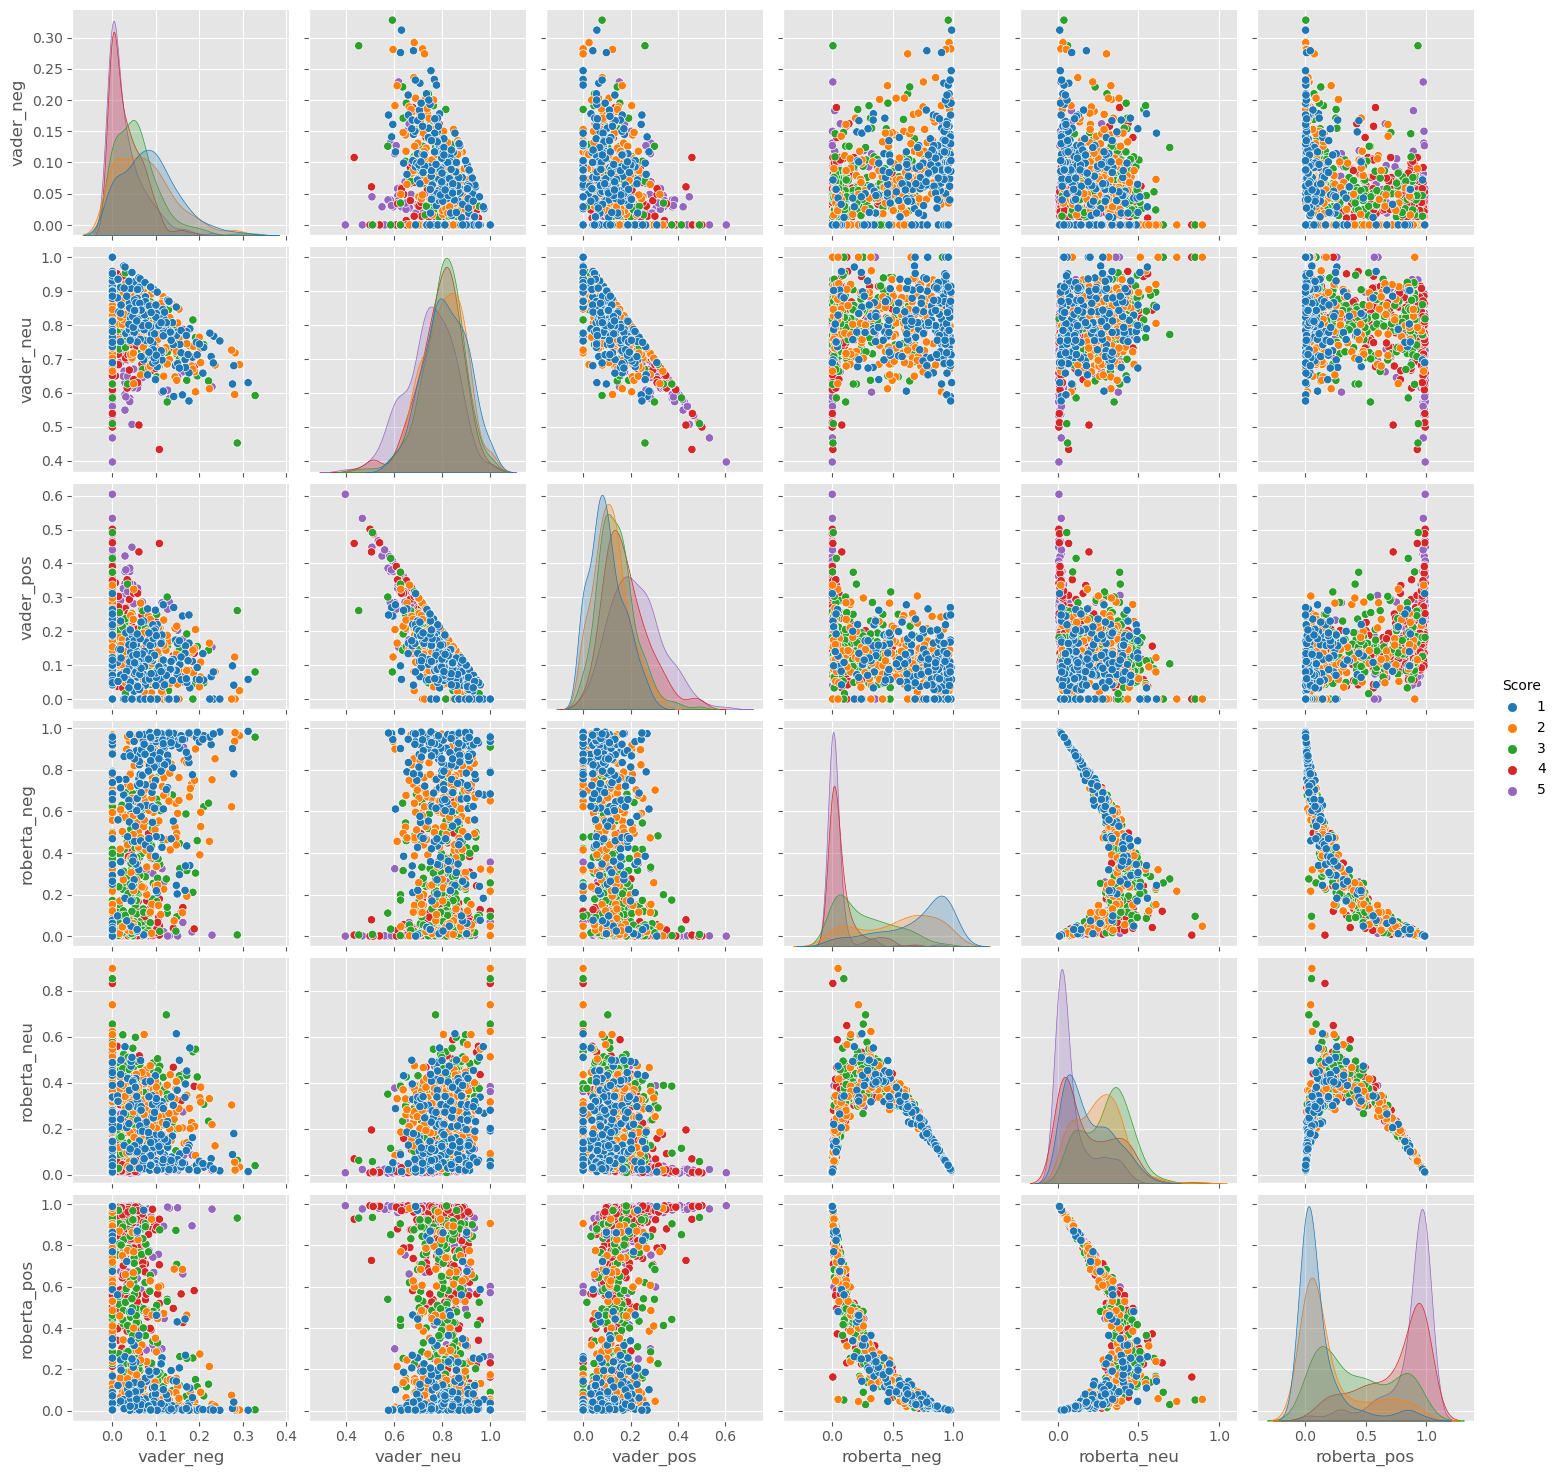

In [37]:
sns.pairplot(data=resultsDf,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Checking where the score and the results from the models differ the most

In [38]:
resultsDf.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Chip Davis has created a wonderful hot chocolate drink and I have purchased<br />a number of cans as Christmas gifts for family and friends.  My family and<br />I always enjoy the flavor any time of day or night and have been enjoying it<br />for years.'

In [39]:
resultsDf.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'Chip Davis has created a wonderful hot chocolate drink and I have purchased<br />a number of cans as Christmas gifts for family and friends.  My family and<br />I always enjoy the flavor any time of day or night and have been enjoying it<br />for years.'

In [40]:
resultsDf.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'Just like the Nabisco Lemon Coolers before they discontinued them. I have been searching for them for over ten years! Too bad even THIS seller no longer makes them. Does anybody else?'

In [41]:
resultsDf.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'I love this cinnamon tea and had a hard time finding it. When I ordered it, it was sent right away. I have no complaints.'

Transofrmers Pipeline

In [42]:
from transformers import pipeline

model = pipeline("sentiment-analysis")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


## Test out the transformers model

In [43]:
model("I love coding")

[{'label': 'POSITIVE', 'score': 0.9996923208236694}]

In [44]:
model("I hate coding")

[{'label': 'NEGATIVE', 'score': 0.9987261891365051}]

In [45]:
model("My feelings for coding depends on the number of errors popped up")

[{'label': 'NEGATIVE', 'score': 0.9993672966957092}]

In [50]:
print(sample)
model(sample)

I decided to be risky and order a big box on unknown tea - this stuff, along with big boxes of Blueberry and Raspberry.  The other teas were better than expected - but this stuff was just plain unflavorful and weird tasting.  Couldn't taste the strawberry.  Perhaps the weird taste is the Rooibos in the tea.  I have to be sure to never buy a rooibos based tea again, although the stuff is supposed to be good for you.<br /><br />I drink my tea iced and always brew a bag of plain ol green tea in with the herb bags, but I don't think the green tea messed this tea up.  When I first opened the foil pouch, the tea looked different and didn't have that rich fruity smell of the other teas and I thought 'uh oh'.  I was right.<br /><br />Won't be buying this again, but that is purely my personal taste - the kids didn't like it either and they are big tea drinkers.


[{'label': 'NEGATIVE', 'score': 0.9885382652282715}]

In [53]:
import numpy as np

def getPipelineScore(text):
    try:
        result = model(text)[0]
        label, score = result['label'], result['score']
    except:
        label, score = np.nan, np.nan
        print("Token legth is high: ", len(text))
    return label, score

df[['pipeline_sentiment_label', 'pipeline_sentiment_score']] = df['Text'].apply(lambda x: pd.Series(getPipelineScore(x)))


Token legth is high:  2248
Token legth is high:  2624
Token legth is high:  3308
Token legth is high:  2793
Token legth is high:  2932
Token legth is high:  2159
Token legth is high:  2329
Token legth is high:  2534
Token legth is high:  3508
Token legth is high:  2347
Token legth is high:  2242
Token legth is high:  2163
Token legth is high:  2479
Token legth is high:  2420
Token legth is high:  3069
Token legth is high:  3381
Token legth is high:  4622


In [57]:
df.head()

,Id,Text,Score,Summary,pipeline_sentiment_label,pipeline_sentiment_score
0,462710,"I just used this product for the first time, I...",5,It tastes great!!!,POSITIVE,0.999595
1,168807,I like this over all other sports drinks becau...,5,Great stuff!,POSITIVE,0.998020
2,193266,With the baking season upon me I realized I wa...,5,Super tasty and great value here..today.,POSITIVE,0.999605
3,361887,We normally drink treehugger by coffee people ...,5,As good as treehugger,POSITIVE,0.999695
4,120498,Having received a new Keurig brewer during the...,5,Love these cappuccino k-cups,NEGATIVE,0.984994


In [58]:
df['Text'][4]

'Having received a new Keurig brewer during the holidays, I was disappointed that the company no longer carries cappuccino cups. Voila! Amazon & Grove Square to the rescue. Good flavor and value. Signed up for automatic delivery, too.'

## checking rows that were marked negative by piepline but original score is 5 (positive)

In [62]:
errorDf = df[(df['Score'] == 5) & (df['pipeline_sentiment_label'] == "NEGATIVE")]
errorDf.head()

,Id,Text,Score,Summary,pipeline_sentiment_label,pipeline_sentiment_score
4,120498,Having received a new Keurig brewer during the...,5,Love these cappuccino k-cups,NEGATIVE,0.984994
10,450301,"Ingredients listed: Pure cane sugar, and 100% ...",5,My Experience,NEGATIVE,0.987047
13,182819,Got the recommendation from the F-Factor Diet ...,5,"Benefits out""weigh"" flavor",NEGATIVE,0.982759
14,279080,I have always loved the Garden of Eatin' Chili...,5,Wow!,NEGATIVE,0.976979
16,271046,"<a href=""http://www.amazon.com/gp/product/B000...",5,Gardetto's Roasted Garlic Rye Chips...yum,NEGATIVE,0.975935


In [64]:
errorDf['Text'][4]

'Having received a new Keurig brewer during the holidays, I was disappointed that the company no longer carries cappuccino cups. Voila! Amazon & Grove Square to the rescue. Good flavor and value. Signed up for automatic delivery, too.'